University X is currently undergoing some research involving understanding the characteristics of
plant and plant seedlings at various stages of growth. They already have have invested on curating sample
images. They require an automation which can create a classifier capable of determining a plant's species from a
photo

# We will fit Supervised Machine Learning, NN's and CNN's

Let's first import the relevant libraries

In [ ]:
import os        
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


We will now read the input using ImageDataGenerator

# Import the data

Let's import the input data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!unzip -u "/content/drive/My Drive/Computer Vision/train.zip" -d "/content/drive/My Drive/Computer Vision/train"

Archive:  /content/drive/My Drive/Computer Vision/train.zip


In [ ]:
datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
data = datagen.flow_from_directory('/content/drive/My Drive/Computer Vision/train',target_size=(64,64),batch_size=4750,class_mode='categorical',subset="training")

Found 4750 images belonging to 12 classes.


In [ ]:
X,y = next(data)

# Dimensions of the data

Let's now look at the dimensions of the data

In [ ]:
X.shape

(4750, 64, 64, 3)

We have 4750 inputs of dimensions 64*64 and 3 channels

In [ ]:
y.shape

(4750, 12)

We have 4750 ouput values and 12 columns as there are 12 categories

# Let's visualize some of the images

In [ ]:
photos = X[0:25]

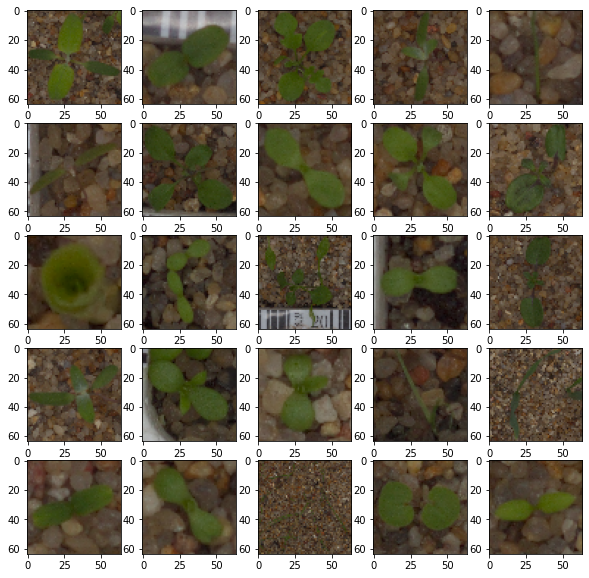

In [ ]:
fig,axes = plt.subplots(5,5,figsize=(10,10))

for i in range(25):
  ax = axes[i//5,i%5]
  ax.imshow(photos[i],cmap='gray')
plt.show()

Let's now look at another set of 25 plants

In [ ]:
photos = X[4000:4025]

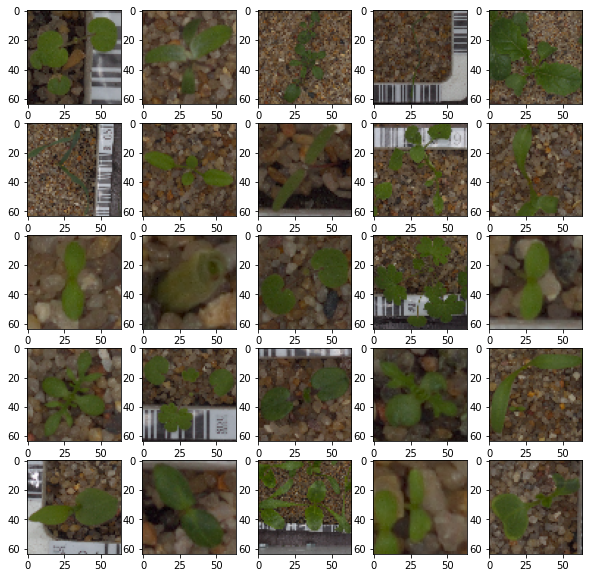

In [ ]:
fig,axes = plt.subplots(5,5,figsize=(10,10))

for i in range(25):
  ax = axes[i//5,i%5]
  ax.imshow(photos[i],cmap='gray')
plt.show()

We will now build models on this data to be able to correctly classify what plant each of them is

Let's now design, train, tune and test the best AIML image classifier model using:
- Supervised learning algorithms
- Neural networks
- CNN

# Supervised Machine Learning

We will train a series of supervised machine learning algorithms to correctly be able to predict the species of each plant

We will now reshape the data so that we can apply supervised learning algorithms. The columns should equal the product of height, width and number of channels. We are in effect flattening the data

In [ ]:
X_change = X.reshape(4750,12288)

In [ ]:
y_change = np.argmax(y,axis=1)

Let's split the data into train and test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_change, y_change, test_size=0.33, random_state=42)

We will now apply a series of supervised learning algorithms. We will calculate the accuracy of each of them and finally pick the alogirthm that gives the best accuracy score

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.9044626021370208
0.47767857142857145


Naive Baye's

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
mnb = MultinomialNB()

In [ ]:
mnb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
print(mnb.score(X_train,y_train))
print(mnb.score(X_test,y_test))

0.39126335637963544
0.2927295918367347


SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()

In [ ]:
svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print(svc.score(X_train,y_train))
print(svc.score(X_test,y_test))

0.8359522313010685
0.48341836734693877


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dc = DecisionTreeClassifier()

In [ ]:
dc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
print(dc.score(X_train,y_train))
print(dc.score(X_test,y_test))

1.0
0.2576530612244898


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rc = RandomForestClassifier()

In [ ]:
rc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
print(rc.score(X_train,y_train))
print(rc.score(X_test,y_test))

1.0
0.49362244897959184


Adaptive Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ac = AdaBoostClassifier()

In [ ]:
ac.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [ ]:
print(ac.score(X_train,y_train))
print(ac.score(X_test,y_test))

0.2884978001257071
0.2889030612244898


Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gc = GradientBoostingClassifier()

In [ ]:
gc.fit(X_train,y_train)

In [ ]:
print(gc.score(X_train,y_train))
print(gc.score(X_test,y_test))

0.9783155248271528
0.5255102040816326


XGBoost

In [ ]:
import xgboost

In [ ]:
xgc = xgboost.XGBClassifier()

In [ ]:
xgc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
print(xgc.score(X_train,y_train))
print(xgc.score(X_test,y_test))

0.9223758642363293
0.5522959183673469


We got the best accuracy for xgboost at around 55%. We could have improved it further by applying performance tuning but since that is not the focus of the current exercise, we will settle at 55.2% as the best accuracy we got from supervised learning. We will next go ahead with building a Neural Network

# Neural Networks

Let's build a Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras import regularizers,optimizers

We will reshape the data here also so that the number of columns will equal the product of height, weight and number of channels

In [ ]:
X_change = X.reshape(4750,12288)

Here also, we will split the data into train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_change, y, test_size=0.33, random_state=42)

We will build a function here, so that we can check the learning rate which provides the best score. We will have 6150 neurons in the hidden layer which is an average of input and output neurons(thumb rule)

In [ ]:
def tune_model(iterations,lr):
  iterations=iterations
  learning_rate = lr
  hidden_nodes = 6150
  output_nodes=12

  model = Sequential()
  model.add(Dense(hidden_nodes,input_shape=(12288,),activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.2))
  model.add(Dense(output_nodes,activation='softmax'))

  adam = optimizers.Adam(learning_rate=learning_rate)

  model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])
  model.fit(X_train,y_train,epochs=iterations,validation_data=(X_test,y_test),batch_size=50)

  score = model.evaluate(X_train,y_train,verbose=0)
  return score

We will run 10 iterations of 10 epochs each and check the accuracies and the corresponding learning rates

In [ ]:
import math

for k in range(1,11):
  learning_rate = math.pow(10,np.random.uniform(-7,-4))
  tune_model(10,learning_rate)
  print("The learning rate is {}".format(learning_rate))
  print("The end of {} iteration".format(k))

Epoch 1/10
64/64 [==============================] - 37s 566ms/step - loss: 2.9623 - accuracy: 0.0933 - val_loss: 2.4835 - val_accuracy: 0.1161
Epoch 2/10
64/64 [==============================] - 36s 559ms/step - loss: 2.6527 - accuracy: 0.1414 - val_loss: 2.4603 - val_accuracy: 0.1244
Epoch 3/10
64/64 [==============================] - 36s 558ms/step - loss: 2.4494 - accuracy: 0.1923 - val_loss: 2.4240 - val_accuracy: 0.1435
Epoch 4/10
64/64 [==============================] - 36s 558ms/step - loss: 2.2908 - accuracy: 0.2420 - val_loss: 2.3633 - val_accuracy: 0.1741
Epoch 5/10
64/64 [==============================] - 36s 561ms/step - loss: 2.1731 - accuracy: 0.2750 - val_loss: 2.3216 - val_accuracy: 0.1805
Epoch 6/10
64/64 [==============================] - 36s 558ms/step - loss: 2.0812 - accuracy: 0.3105 - val_loss: 2.2516 - val_accuracy: 0.2188
Epoch 7/10
64/64 [==============================] - 36s 557ms/step - loss: 1.9801 - accuracy: 0.3400 - val_loss: 2.2117 - val_accuracy: 0.2328

We are getting the highest validation accuracy at a learning rate of 1.9038668484853744e-06

We will now define a callback for early stopping

In [ ]:
import tensorflow
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=4, min_delta=0.01)

We will now run the model at the learning rate we found above

In [ ]:
iterations=30
learning_rate = 1.9038668484853744e-06
hidden_nodes = 6150
output_nodes=12

model = Sequential()
model.add(Dense(hidden_nodes,input_shape=(12288,),activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(output_nodes,activation='softmax'))

adam = optimizers.Adam(learning_rate=learning_rate)

model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])
model.fit(X_train,y_train,epochs=iterations,validation_data=(X_test,y_test),batch_size=50,callbacks=[callback])

Epoch 1/30
64/64 [==============================] - 37s 568ms/step - loss: 2.7888 - accuracy: 0.1172 - val_loss: 2.4584 - val_accuracy: 0.1416
Epoch 2/30
64/64 [==============================] - 36s 569ms/step - loss: 2.2601 - accuracy: 0.2454 - val_loss: 2.3696 - val_accuracy: 0.1741
Epoch 3/30
64/64 [==============================] - 39s 611ms/step - loss: 1.9885 - accuracy: 0.3356 - val_loss: 2.3092 - val_accuracy: 0.1645
Epoch 4/30
64/64 [==============================] - 36s 569ms/step - loss: 1.8020 - accuracy: 0.3982 - val_loss: 2.1753 - val_accuracy: 0.2640
Epoch 5/30
64/64 [==============================] - 36s 569ms/step - loss: 1.6334 - accuracy: 0.4708 - val_loss: 2.1071 - val_accuracy: 0.2819
Epoch 6/30
64/64 [==============================] - 36s 571ms/step - loss: 1.5185 - accuracy: 0.5176 - val_loss: 2.0233 - val_accuracy: 0.3061
Epoch 7/30
64/64 [==============================] - 37s 572ms/step - loss: 1.4199 - accuracy: 0.5459 - val_loss: 1.9478 - val_accuracy: 0.3374

We have an accuracy of around 45% which is lower than what we got from xgboost. We will next use CNN's and see how the performance will change

# Convolutional Neural Network

Let's build a CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization,Conv2D,MaxPooling2D
from tensorflow.keras import regularizers,optimizers

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

We will create 3 convolutions of size 8, 16 and 32 and then create an FC with 128 neurons in the hidden layer and 12 neurons in the output layer

In [ ]:
def model_cnn(n,lr):

  epochs = n

  lr = lr


  model = Sequential()

  model.add(Conv2D(filters=8,kernel_size=3,activation='relu',input_shape=(64,64,3)))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(BatchNormalization())
  #model.add(Dropout(0.2))
  model.add(Conv2D(filters=16,kernel_size=3,activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(BatchNormalization())
  #model.add(Dropout(0.2))
  model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))

  model.add(Flatten())
  model.add(Dense(128,activation='relu'))
  model.add(Dense(12,activation='softmax'))

  optimizer = optimizers.Adam(learning_rate = lr)

  model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

  model.fit(x=X_train, y=y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

We will run 10 iterations of 10 epochs each and check the accuracies and the corresponding learning rates

In [ ]:
import math

for k in range(1,21):
  learning_rate = math.pow(10,np.random.uniform(-7,-4))
  model_cnn(10,learning_rate)
  print("The learning rate is {}".format(learning_rate))
  print("The end of {} iteration".format(k))

Epoch 1/10
100/100 [==============================] - 10s 90ms/step - loss: 2.7425 - accuracy: 0.0789 - val_loss: 2.5167 - val_accuracy: 0.0523
Epoch 2/10
100/100 [==============================] - 9s 88ms/step - loss: 2.6618 - accuracy: 0.0867 - val_loss: 2.5293 - val_accuracy: 0.1078
Epoch 3/10
100/100 [==============================] - 9s 88ms/step - loss: 2.5991 - accuracy: 0.0955 - val_loss: 2.5157 - val_accuracy: 0.1084
Epoch 4/10
100/100 [==============================] - 9s 88ms/step - loss: 2.5542 - accuracy: 0.1128 - val_loss: 2.4897 - val_accuracy: 0.1071
Epoch 5/10
100/100 [==============================] - 9s 88ms/step - loss: 2.5207 - accuracy: 0.1131 - val_loss: 2.4717 - val_accuracy: 0.1180
Epoch 6/10
100/100 [==============================] - 9s 88ms/step - loss: 2.4908 - accuracy: 0.1257 - val_loss: 2.4628 - val_accuracy: 0.1314
Epoch 7/10
100/100 [==============================] - 9s 88ms/step - loss: 2.4660 - accuracy: 0.1323 - val_loss: 2.4574 - val_accuracy: 0.144

We got the highest accuracy at a learning rate of 9.092371837156582e-05. Let's go ahead with that

In [ ]:
from tensorflow import keras

We will now define a callback for early stopping

In [ ]:
import tensorflow
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=4, min_delta=0.01)

In [ ]:
epochs=30
lr = 9.092371837156582e-05

model = Sequential()

model.add(Conv2D(filters=8,kernel_size=3,activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
#model.add(Dropout(0.2))
model.add(Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
#model.add(Dropout(0.2))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(12,activation='softmax'))

optimizer = optimizers.Adam(learning_rate = lr)

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x=X_train, y=y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test),callbacks=[callback])

Epoch 1/30
100/100 [==============================] - 10s 94ms/step - loss: 2.2413 - accuracy: 0.2263 - val_loss: 2.4728 - val_accuracy: 0.1212
Epoch 2/30
100/100 [==============================] - 9s 90ms/step - loss: 1.7863 - accuracy: 0.4023 - val_loss: 2.7569 - val_accuracy: 0.1205
Epoch 3/30
100/100 [==============================] - 9s 91ms/step - loss: 1.4558 - accuracy: 0.5302 - val_loss: 2.9426 - val_accuracy: 0.1327
Epoch 4/30
100/100 [==============================] - 9s 93ms/step - loss: 1.1499 - accuracy: 0.6505 - val_loss: 2.3981 - val_accuracy: 0.2417
Epoch 5/30
100/100 [==============================] - 9s 92ms/step - loss: 0.9123 - accuracy: 0.7335 - val_loss: 2.2916 - val_accuracy: 0.3093
Epoch 6/30
100/100 [==============================] - 9s 93ms/step - loss: 0.7452 - accuracy: 0.7901 - val_loss: 1.5230 - val_accuracy: 0.4656
Epoch 7/30
100/100 [==============================] - 9s 92ms/step - loss: 0.6025 - accuracy: 0.8441 - val_loss: 1.2001 - val_accuracy: 0.584

The accuracy is around 68% which is the highest among the three methods we have done so far

# Result Comparison

We have tried three approaches. We have tried

- Supervised Learning Algorithms
- Neural Networks
- Convolutional Neural Networks

Among Supervised techniques, XGboost outperformed the rest and gave a validation accuracy of around 55%.

Neural Networks gave a validation accuracy of around 45%.

CNN's outperformed the rest. They gave a validation accuracy of around 68%. It is expected that CNN's will outperform the rest due to convolutions. The convolutions extract features from the data. The earlier convolutions extract broader features while the latter ones extract more specific features. These convolutions are akin to the feature engineering steps we do as part of Machine Learning and hence improve the accuracy of the model. The regular Neural Networks don't include this and hence we cannot expect them to perform on par with CNN's.

# Pickle the best performing model

We will now pickle the best performing model which is CNN

In [ ]:
model.save('/content/drive/My Drive/Computer Vision/cnn_model.pkl')
model.save_weights('/content/drive/My Drive/Computer Vision/cnn_model_weights.pkl')

INFO:tensorflow:Assets written to: /content/drive/My Drive/Computer Vision/cnn_model.pkl/assets


# Import the the test image to predict the class. Display the image. Use the best trained image classifier model to predict the class.

Let's load the pretrained model and model weights

In [ ]:
from tensorflow.keras.models import load_model

pretrained_model = load_model('/content/drive/My Drive/Computer Vision/cnn_model.pkl')
pretrained_model.load_weights('/content/drive/My Drive/Computer Vision/cnn_model_weights.pkl')

Let's test model on a single image

In [ ]:
tests = datagen.flow_from_directory('/content/drive/My Drive/Computer Vision',target_size=(64,64),classes=['Seedling - Prediction'])

Found 1 images belonging to 1 classes.


In [ ]:
X_t,y_t = next(tests)

In [ ]:
X_t.shape

(1, 64, 64, 3)

Let's now visualize the test image below

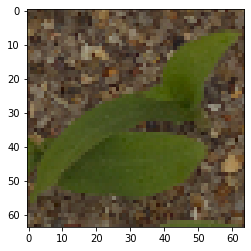

In [ ]:
plt.imshow(X_t.reshape(64,64,3));

Let's now predict the test image

In [ ]:
np.argmax(pretrained_model.predict(X_t))

7

We have predicted the test image to be 7. Let's look at the dictionary to see what 7 is

In [ ]:
data.class_indices

{'Black-grass': 0,
 'Charlock': 1,
 'Cleavers': 2,
 'Common Chickweed': 3,
 'Common wheat': 4,
 'Fat Hen': 5,
 'Loose Silky-bent': 6,
 'Maize': 7,
 'Scentless Mayweed': 8,
 'Shepherds Purse': 9,
 'Small-flowered Cranesbill': 10,
 'Sugar beet': 11}

We can see that 7 corresponds to Maize. We have predicted the test image to be Maize